In [3]:
#Import Libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sgt import SGT
from collections import defaultdict

import os 
pd.set_option('display.max_rows', 20)


# Training Experience: 10-11 months: Subjects 1,3,5,6

## Top Con - No Bias Boxes

### Healthy

In [53]:
#Read Corpus
path13 = '../../TOP_CON/Healthy/Healthy(1,3)/'
path5 = '../../TOP_CON/Healthy/Healthy(5)/'
path6 = '../../TOP_CON/Healthy/Healthy(6)/'
paths = [path13,path5, path6]

dict_images_healthy = defaultdict(list)
def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                #print(new_path[-33:-29])
                df = pd.read_csv(new_path)
                df['fixation_id_new'] = df['fixation_id'] - df.iloc[0,2] + 1
                dict_images_healthy[str(new_path[-33:-29])].append(df)
                
                
                #yield pd.read_csv(new_path)
load_files(paths)

for i in dict_images_healthy.keys(): 
    dict_images_healthy[i] = pd.concat(dict_images_healthy[i])
dict_images_healthy['9223']



,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,fixation_id_new
0,348708.250750,5262,324,348708.236075,80.6900,1.469479,0.297020,0.348465,0.297020,0.348465,True,1
1,348708.284261,5263,324,348708.236075,80.6900,1.469479,0.295145,0.348908,0.295145,0.348908,True,1
2,348708.518834,5268,325,348708.510423,96.8280,1.231624,0.404349,0.354698,0.404349,0.354698,True,2
3,348708.552344,5269,325,348708.510423,96.8280,1.231624,0.399859,0.354932,0.399859,0.354932,True,2
4,348708.619365,5270,325,348708.510423,96.8280,1.231624,0.390286,0.351950,0.390286,0.351950,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...
80,327838.325989,6149,1914,327838.228040,177.6370,1.166081,0.214112,0.735739,0.214112,0.735739,True,33
81,327838.415879,6150,1914,327838.228040,177.6370,1.166081,0.215588,0.734505,0.215588,0.734505,True,33
82,327838.496197,6151,1915,327838.480316,166.9505,1.434187,0.880323,0.478491,0.880323,0.478491,True,34
83,327838.578148,6152,1915,327838.480316,166.9505,1.434187,0.883698,0.471010,0.883698,0.471010,True,34


In [54]:
def equal_boxes(x,y):
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.25 > i and 0<j and 0.25 > j: 
            arr.append('A')
        elif 0.25<i and 0.5 > i and 0<j and 0.25 > j: 
            arr.append('B')
        elif 0.5<i and 0.75 > i and 0<j and 0.25 > j: 
            arr.append('C')
        elif 0.75<i and 1 > i and 0<j and 0.25 > j: 
            arr.append('D')
        elif 0<i and 0.25 > i and 0.25<j and 0.5 > j: 
            arr.append('E')
        elif 0.25<i and 0.5 > i and 0.25<j and 0.5 > j: 
            arr.append('F')
        elif 0.5<i and 0.75 > i and 0.25<j and 0.5 > j: 
            arr.append('G')
        elif 0.75<i and 1 > i and 0.25<j and 0.5 > j: 
            arr.append('H')
        elif 0<i and 0.25 > i and 0.5<j and 0.75 > j: 
            arr.append('I')
        elif 0.25<i and 0.5 > i and 0.5<j and 0.75 > j: 
            arr.append('J')
        elif 0.5<i and 0.75 > i and 0.5<j and 0.75 > j: 
            arr.append('K')
        elif 0.75<i and 1 > i and 0.5<j and 0.75 > j: 
            arr.append('L')
        elif 0<i and 0.25 > i and 0.75<j and 1 > j: 
            arr.append('M')
        elif 0.25<i and 0.5 > i and 0.75<j and 1 > j: 
            arr.append('N')
        elif 0.5<i and 0.75 > i and 0.75<j and 1 > j: 
            arr.append('O')
        elif 0.75<i and 1 > i and 0.75<j and 1 > j: 
            arr.append('P')
        else: 
            arr.append('error')
    return arr

dict_images_arr = defaultdict()
for i in dict_images_healthy.keys(): 
    x = dict_images_healthy[i].norm_pos_x
    y = dict_images_healthy[i].norm_pos_y
    dict_images_arr[i] = equal_boxes(x,y)

In [55]:
def make_corpus(corpus_new):
    A = np.array(corpus_new.fixation_id_new[corpus_new.letters=='A'])
    B = np.array(corpus_new.fixation_id_new[corpus_new.letters=='B'])
    C = np.array(corpus_new.fixation_id_new[corpus_new.letters=='C'])
    D = np.array(corpus_new.fixation_id_new[corpus_new.letters=='D'])
    E = np.array(corpus_new.fixation_id_new[corpus_new.letters=='E'])
    F = np.array(corpus_new.fixation_id_new[corpus_new.letters=='F'])
    G = np.array(corpus_new.fixation_id_new[corpus_new.letters=='G'])
    H = np.array(corpus_new.fixation_id_new[corpus_new.letters=='H'])
    I = np.array(corpus_new.fixation_id_new[corpus_new.letters=='I'])
    J = np.array(corpus_new.fixation_id_new[corpus_new.letters=='J'])
    K = np.array(corpus_new.fixation_id_new[corpus_new.letters=='K'])
    L = np.array(corpus_new.fixation_id_new[corpus_new.letters=='L'])
    M = np.array(corpus_new.fixation_id_new[corpus_new.letters=='M'])
    N = np.array(corpus_new.fixation_id_new[corpus_new.letters=='N'])
    O = np.array(corpus_new.fixation_id_new[corpus_new.letters=='O'])
    P = np.array(corpus_new.fixation_id_new[corpus_new.letters=='P'])
    corpus = pd.DataFrame([[1, A], 
                           [2, B],
                           [3, C], 
                           [4, D], 
                           [5, E], 
                           [6, F],
                           [7, G], 
                           [8, H], 
                           [9, I], 
                           [10, J],
                           [11, K], 
                           [12, L], 
                           [13, M], 
                           [14, N],
                           [15, O], 
                           [16, P]], 
                          columns=['id', 'sequence'])
    return corpus

for i in dict_images_arr.keys(): 
    dict_images_healthy[i]['letters'] = dict_images_arr[i]
    dict_images_healthy[i] = dict_images_healthy[i][['letters', 'fixation_id_new']]
    dict_images_healthy[i]= make_corpus(dict_images_healthy[i])
    
dict_images_healthy['9223']

,id,sequence
0,1,[]
1,2,"[7, 7, 8, 8, 8, 19, 19, 19, 20, 20, 20, 21, 21..."
2,3,"[1, 11, 17]"
3,4,"[10, 10, 10, 11, 18, 18]"
4,5,[]
5,6,"[1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, ..."
6,7,"[11, 11, 11, 11]"
7,8,"[9, 9, 9, 12, 12, 12, 12, 13, 13, 24, 24, 25, ..."
8,9,"[16, 16, 16, 5, 5, 5, 6, 6, 33, 33, 33]"
9,10,"[27, 27, 27, 28, 28]"


In [57]:
embeddings_dict = defaultdict()
for i in dict_images_healthy.keys(): 
    sgt_ = SGT(kappa=1, 
               lengthsensitive=False, 
               mode='multiprocessing')
    sgtembedding_df = sgt_.fit_transform(dict_images_healthy[i])
    embeddings_dict[i] = sgtembedding_df.set_index('id')
display(embeddings_dict['9223'].columns)

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

Index([  (1, 1),   (1, 2),   (1, 3),   (1, 4),   (1, 5),   (1, 6),   (1, 7),
         (1, 8),   (1, 9),  (1, 10),
       ...
       (34, 25), (34, 26), (34, 27), (34, 28), (34, 29), (34, 30), (34, 31),
       (34, 32), (34, 33), (34, 34)],
      dtype='object', length=1156)

In [60]:
pca_dict = defaultdict()
for i in embeddings_dict.keys(): 
    pca = PCA(n_components=2)
    pca.fit(embeddings_dict[i])
    X=pca.transform(embeddings_dict[i])
    pca_dict[i] = pd.DataFrame(data=X, columns=['x1', 'x2'])


/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

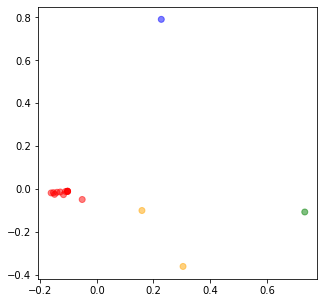

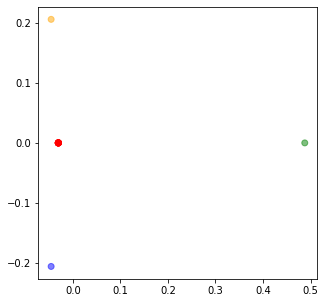

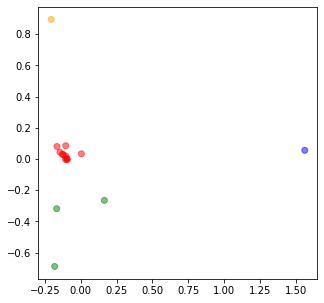

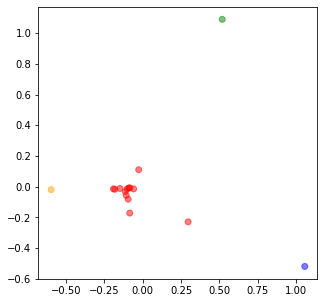

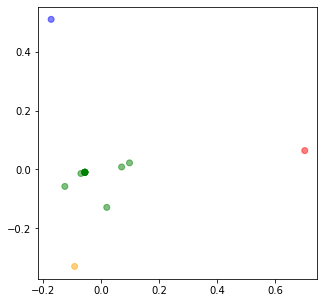

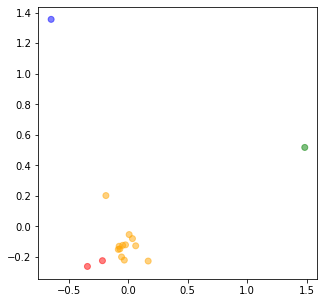

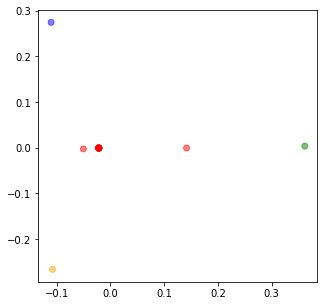

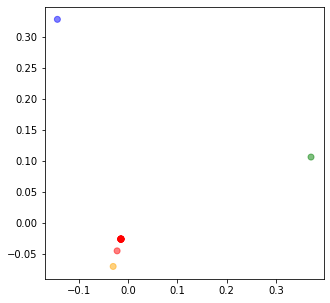

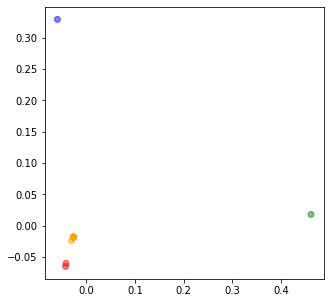

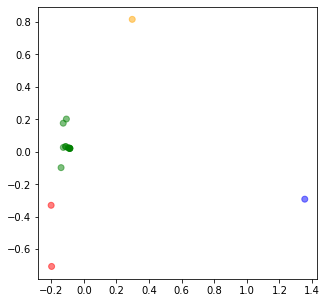

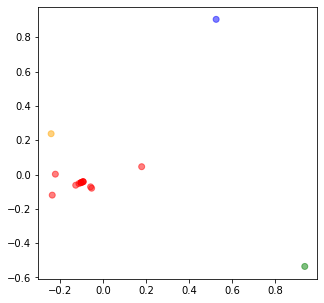

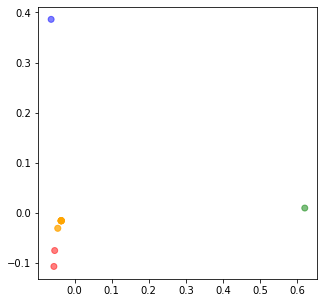

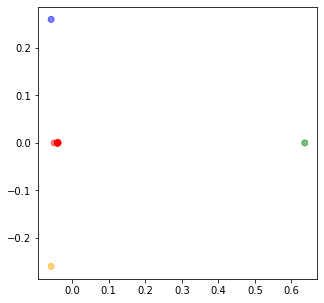

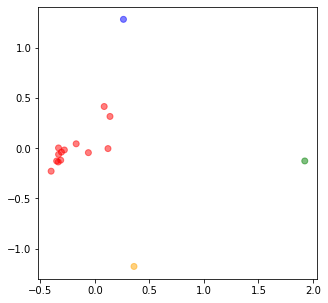

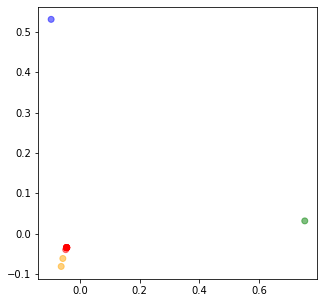

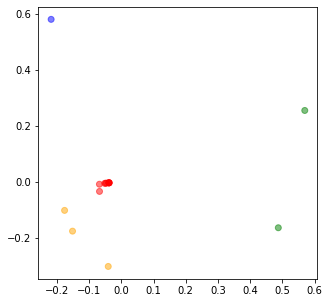

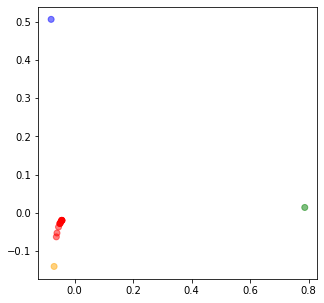

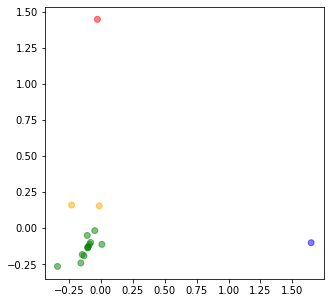

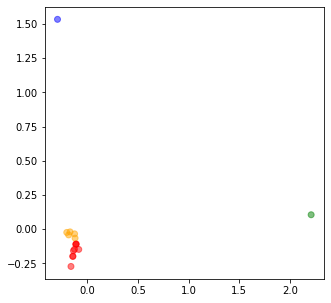

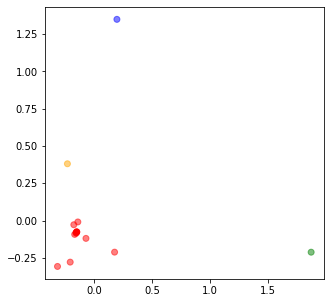

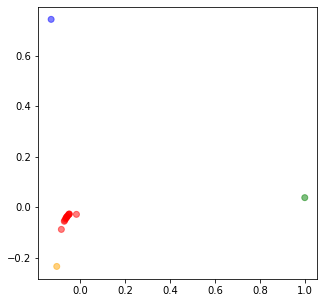

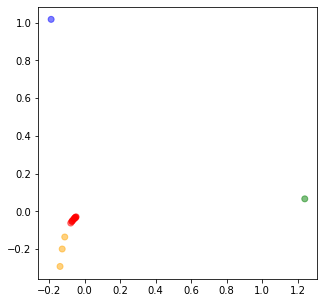

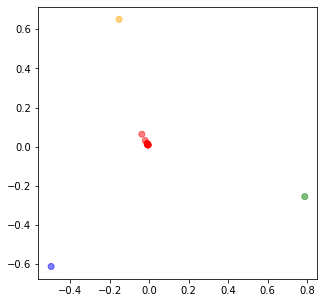

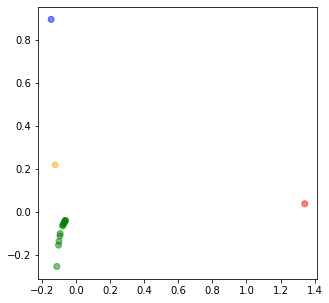

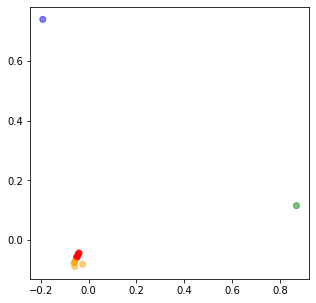

In [62]:
for i in pca_dict.keys():
    
    kmeans = KMeans(n_clusters=4, max_iter =300)
    kmeans.fit(pca_dict[i])

    labels = kmeans.predict(pca_dict[i])
    centroids = kmeans.cluster_centers_

    fig = plt.figure(figsize=(5, 5))
    colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange'}
    colors = list(map(lambda x: colmap[x+1], labels))
    plt.scatter(pca_dict[i]['x1'], pca_dict[i]['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [8]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.286897,-0.283612,orange
1,-0.922277,3.463619,green
2,-0.284229,-0.378112,orange
3,-0.223466,-0.597191,orange
4,-0.263949,-0.236209,orange
5,-0.179073,2.469870,green
6,-0.373230,-0.269628,orange
7,-0.463734,-1.472735,red
8,-0.247156,-0.311689,orange
9,-0.398051,-0.640694,orange


### Glaucoma

In [9]:
#Read Corpus
path13 = '../../TOP_CON/Glaucoma/Glaucoma(1,3)/'
path5 = '../../TOP_CON/Glaucoma/Glaucoma(5)/'
path6 = '../../TOP_CON/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]


def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                yield pd.read_csv(new_path)


corpus_diseased = pd.concat(load_files(paths))



In [10]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = equal_boxes(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus(corpus_new)

In [11]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [12]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


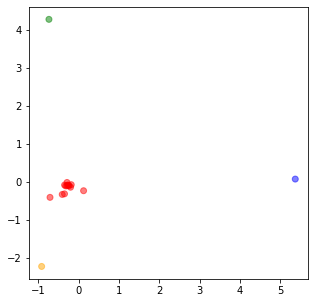

In [13]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [14]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.319996,-0.109014,red
1,-0.735891,4.284507,green
2,-0.708963,-0.411465,red
3,-0.917002,-2.233945,orange
4,-0.287507,-0.019032,red
5,-0.348075,-0.085632,red
6,-0.405771,-0.334177,red
7,-0.349681,-0.318574,red
8,-0.287564,-0.104317,red
9,-0.199957,-0.144182,red


## Top Con -  Bias Boxes

### Healthy

In [4]:
#Read Corpus
path13 = '../../TOP_CON/Healthy/Healthy(1,3)/'
path5 = '../../TOP_CON/Healthy/Healthy(5)/'
path6 = '../../TOP_CON/Healthy/Healthy(6)/'
paths = [path13,path5, path6]

dict_images_healthy = defaultdict(list)
def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                #print(new_path[-33:-29])
                df = pd.read_csv(new_path)
                df['fixation_id_new'] = df['fixation_id'] - df.iloc[0,2] + 1
                dict_images_healthy[str(new_path[-33:-29])].append(df)
                
                
                #yield pd.read_csv(new_path)
load_files(paths)

for i in dict_images_healthy.keys(): 
    dict_images_healthy[i] = pd.concat(dict_images_healthy[i])
dict_images_healthy['9223']



,world_timestamp,world_index,fixation_id,start_timestamp,duration,dispersion,norm_pos_x,norm_pos_y,x_scaled,y_scaled,on_surf,fixation_id_new
0,348708.250750,5262,324,348708.236075,80.6900,1.469479,0.297020,0.348465,0.297020,0.348465,True,1
1,348708.284261,5263,324,348708.236075,80.6900,1.469479,0.295145,0.348908,0.295145,0.348908,True,1
2,348708.518834,5268,325,348708.510423,96.8280,1.231624,0.404349,0.354698,0.404349,0.354698,True,2
3,348708.552344,5269,325,348708.510423,96.8280,1.231624,0.399859,0.354932,0.399859,0.354932,True,2
4,348708.619365,5270,325,348708.510423,96.8280,1.231624,0.390286,0.351950,0.390286,0.351950,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...
80,327838.325989,6149,1914,327838.228040,177.6370,1.166081,0.214112,0.735739,0.214112,0.735739,True,33
81,327838.415879,6150,1914,327838.228040,177.6370,1.166081,0.215588,0.734505,0.215588,0.734505,True,33
82,327838.496197,6151,1915,327838.480316,166.9505,1.434187,0.880323,0.478491,0.880323,0.478491,True,34
83,327838.578148,6152,1915,327838.480316,166.9505,1.434187,0.883698,0.471010,0.883698,0.471010,True,34


In [5]:
def bias_boxes(x,y): 
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.6 > i and 0<j and 0.6 > j: 
            arr.append('A')
        elif 0<i and 0.25 > i and 0.6<j and 1 > j: 
            arr.append('B')
        elif 0.25<i and 0.48 > i and 0.6<j and 1 > j: 
            arr.append('C')
        elif 0.48<i and 0.6 > i and 0.6<j and 1 > j: 
            arr.append('D')
        elif 0.6<i and 1 > i and 0<j and 0.6 > j: 
            arr.append('E')
        elif 0.6<i and 0.77 > i and 0.6<j and 1 > j: 
            arr.append('F')
        elif 0.77<i and 1 > i and 0.6<j and 1 > j: 
            arr.append('G')
        else: 
            arr.append('error')
            
    return arr

dict_images_arr = defaultdict()
for i in dict_images_healthy.keys(): 
    x = dict_images_healthy[i].norm_pos_x
    y = dict_images_healthy[i].norm_pos_y
    dict_images_arr[i] = bias_boxes(x,y)



In [6]:
def make_corpus_2(corpus_new): 
    A = np.array(corpus_new.fixation_id_new[corpus_new.letters=='A'])
    B = np.array(corpus_new.fixation_id_new[corpus_new.letters=='B'])
    C = np.array(corpus_new.fixation_id_new[corpus_new.letters=='C'])
    D = np.array(corpus_new.fixation_id_new[corpus_new.letters=='D'])
    E = np.array(corpus_new.fixation_id_new[corpus_new.letters=='E'])
    F = np.array(corpus_new.fixation_id_new[corpus_new.letters=='F'])
    G = np.array(corpus_new.fixation_id_new[corpus_new.letters=='G'])
    corpus = pd.DataFrame([[1, A], 
                           [2, B],
                           [3, C], 
                           [4, D], 
                           [5, E], 
                           [6, F],
                           [7, G]], columns=['id', 'sequence'])
    return corpus

for i in dict_images_arr.keys(): 
    dict_images_healthy[i]['letters'] = dict_images_arr[i]
    dict_images_healthy[i] = dict_images_healthy[i][['letters', 'fixation_id_new']]
    dict_images_healthy[i]= make_corpus_2(dict_images_healthy[i])
    

In [7]:
# l = corpus.reset_index()
# l.columns = ['regions', 'id', 'fixation ids']
# l[['regions', 'fixation ids']]
dict_images_healthy['9223']


,id,sequence
0,1,"[1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, ..."
1,2,"[5, 5, 5, 6, 6, 33, 33, 33]"
2,3,"[27, 27, 27, 28, 28, 29, 29, 29, 32, 32, 32]"
3,4,"[30, 30]"
4,5,"[15, 1, 9, 9, 9, 10, 10, 10, 11, 11, 12, 12, 1..."
5,6,"[16, 16, 31, 31]"
6,7,"[14, 14, 14, 4, 4, 15, 15, 16, 16]"


In [116]:
embeddings_dict = defaultdict()
for i in dict_images_healthy.keys(): 
    sgt_ = SGT(kappa=1, 
               lengthsensitive=False, 
               mode='multiprocessing')
    sgtembedding_df = sgt_.fit_transform(dict_images_healthy[i])
    embeddings_dict[i] = sgtembedding_df.set_index('id')
display(embeddings_dict['9223'].columns)

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

Index([  (1, 1),   (1, 2),   (1, 3),   (1, 4),   (1, 5),   (1, 6),   (1, 7),
         (1, 8),   (1, 9),  (1, 10),
       ...
       (34, 25), (34, 26), (34, 27), (34, 28), (34, 29), (34, 30), (34, 31),
       (34, 32), (34, 33), (34, 34)],
      dtype='object', length=1156)

In [117]:
pca_dict = defaultdict()
for i in embeddings_dict.keys(): 
    pca = PCA(n_components=2)
    pca.fit(embeddings_dict[i])
    X=pca.transform(embeddings_dict[i])
    pca_dict[i] = pd.DataFrame(data=X, columns=['x1', 'x2'])


/tmp/ipykernel_3973526/3986748855.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(5, 5))


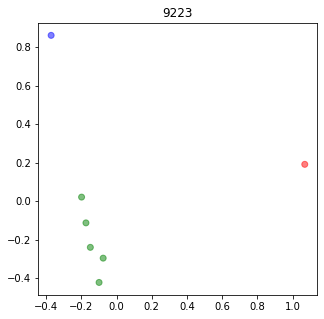

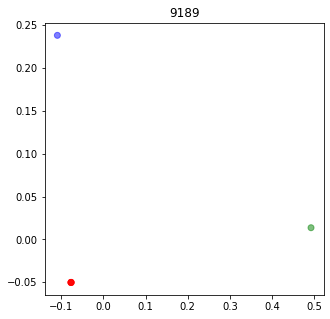

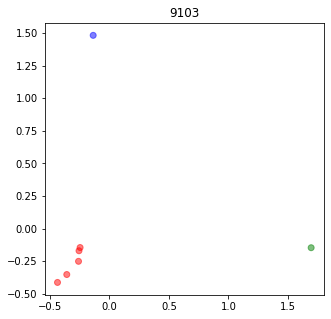

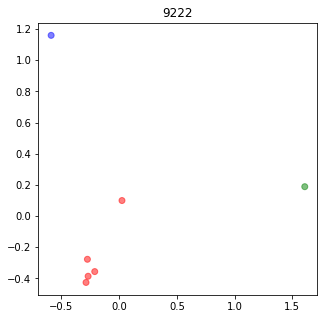

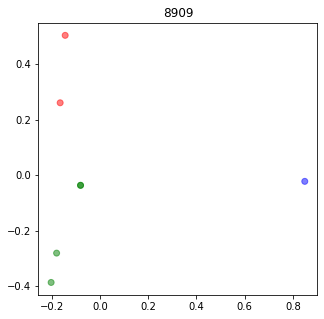

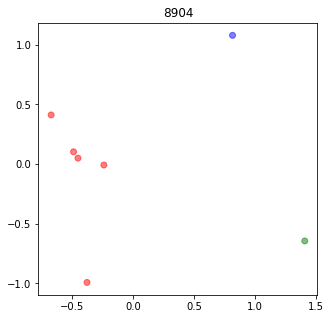

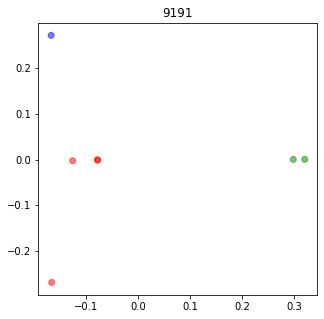

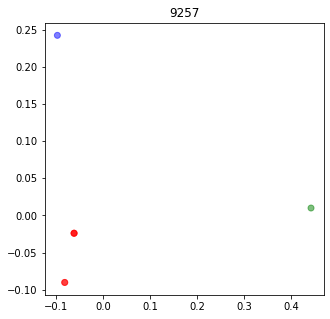

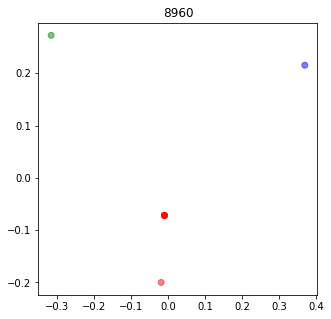

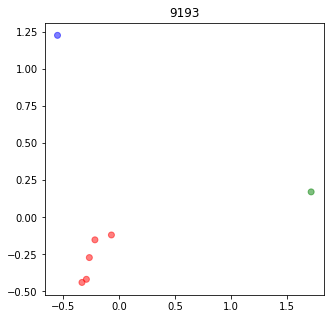

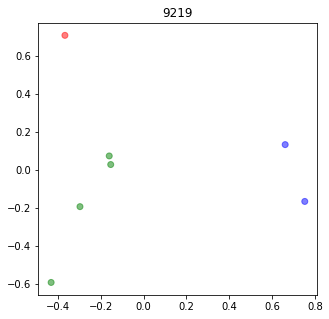

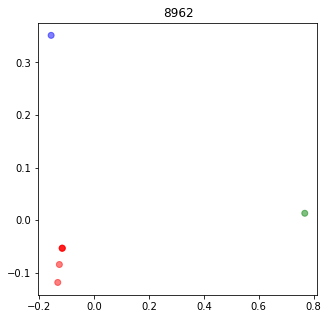

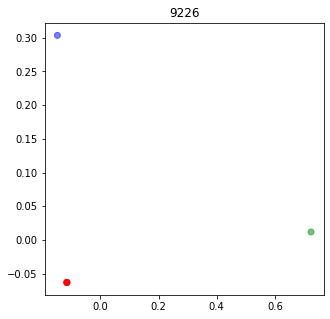

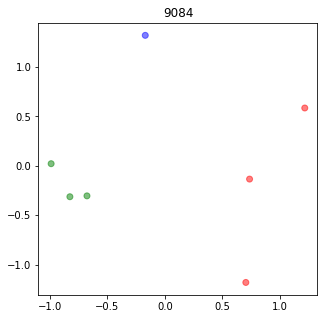

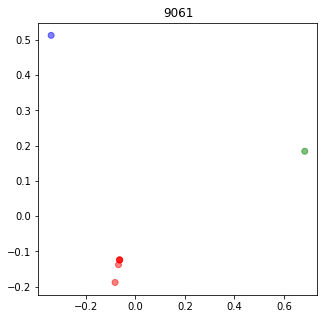

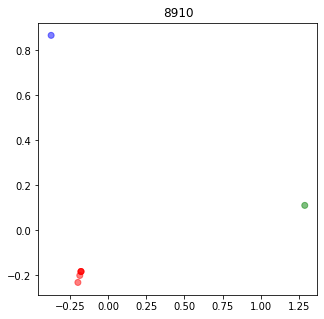

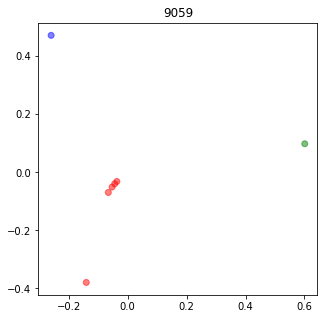

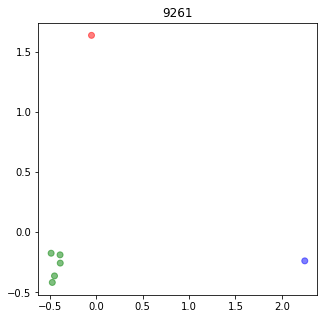

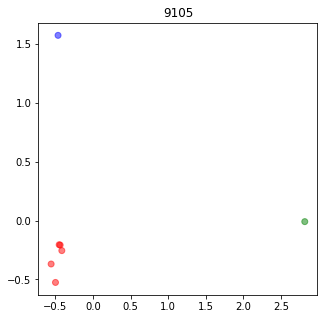

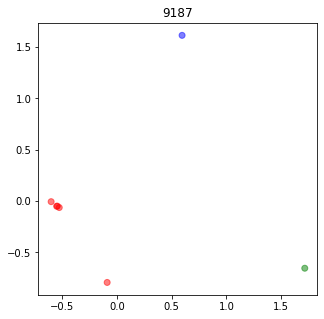

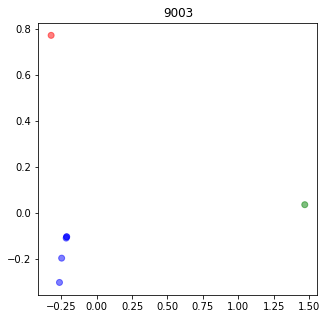

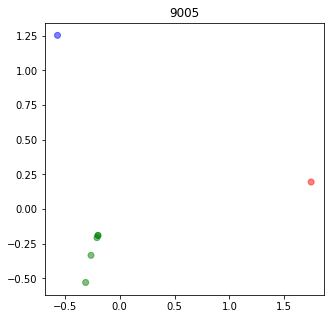

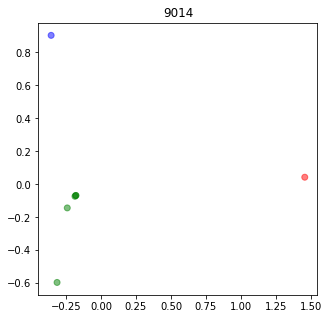

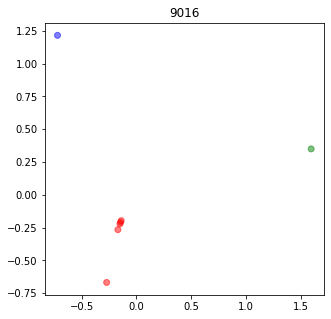

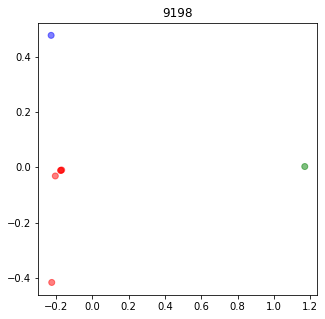

In [118]:
for i in pca_dict.keys():
    
    kmeans = KMeans(n_clusters=3, n_init=5)
    kmeans.fit(pca_dict[i])

    labels = kmeans.predict(pca_dict[i])
    centroids = kmeans.cluster_centers_

    fig = plt.figure(figsize=(5, 5))
#     colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange'}
    colmap = {1: 'red', 2: 'green', 3: 'blue'}

    colors = list(map(lambda x: colmap[x+1], labels))
    pca_dict[i]['labels'] = colors

    plt.scatter(pca_dict[i]['x1'], pca_dict[i]['x2'], color=colors, alpha=0.5, edgecolor=colors)
    plt.title(i)

In [119]:
for i in pca_dict.keys():
    print(i)
    display(pca_dict[i])

9223


,x1,x2,labels
0,-0.371496,0.862073,blue
1,-0.173863,-0.113299,green
2,-0.099393,-0.423169,green
3,-0.076089,-0.296803,green
4,1.068368,0.191130,red
5,-0.148895,-0.240636,green
6,-0.198632,0.020704,green


9189


,x1,x2,labels
0,0.492505,0.013559,green
1,-0.076684,-0.050352,red
2,-0.076684,-0.050352,red
3,-0.076684,-0.050352,red
4,-0.076684,-0.050352,red
5,-0.109084,0.238200,blue
6,-0.076684,-0.050352,red


9103


,x1,x2,labels
0,1.696916,-0.147338,green
1,-0.359140,-0.353086,red
2,-0.260338,-0.251836,red
3,-0.437137,-0.413913,red
4,-0.136950,1.482630,blue
5,-0.256296,-0.170621,red
6,-0.247055,-0.145837,red


9222


,x1,x2,labels
0,-0.589451,1.160189,blue
1,-0.211689,-0.356793,red
2,-0.287086,-0.426574,red
3,-0.275167,-0.277909,red
4,1.608006,0.188386,green
5,-0.269028,-0.386786,red
6,0.024415,0.099486,red


8909


,x1,x2,labels
0,-0.201939,-0.386138,green
1,-0.080058,-0.036794,green
2,-0.179237,-0.280621,green
3,-0.143696,0.502714,red
4,0.849504,-0.022517,blue
5,-0.164517,0.260151,red
6,-0.080058,-0.036794,green


8904


,x1,x2,labels
0,0.817913,1.079139,blue
1,-0.451880,0.050026,red
2,-0.488208,0.103036,red
3,-0.239009,-0.007737,red
4,1.411335,-0.644254,green
5,-0.377670,-0.992173,red
6,-0.672482,0.411963,red


9191


,x1,x2,labels
0,-0.166788,-0.268814,red
1,-0.078549,-0.000760,red
2,0.297963,0.000513,green
3,0.320090,0.000599,green
4,-0.167852,0.271868,blue
5,-0.078549,-0.000760,red
6,-0.126316,-0.002647,red


9257


,x1,x2,labels
0,0.442648,0.009947,green
1,-0.061226,-0.023953,red
2,-0.081121,-0.090137,red
3,-0.061226,-0.023953,red
4,-0.081121,-0.090137,red
5,-0.061226,-0.023953,red
6,-0.096730,0.242186,blue


8960


,x1,x2,labels
0,-0.314689,0.272421,green
1,-0.009136,-0.071930,red
2,-0.009136,-0.071930,red
3,-0.009136,-0.071930,red
4,-0.017981,-0.200029,red
5,-0.009136,-0.071930,red
6,0.369214,0.215329,blue


9193


,x1,x2,labels
0,-0.547485,1.227698,blue
1,-0.214103,-0.151775,red
2,-0.329603,-0.439217,red
3,-0.263758,-0.271423,red
4,1.712336,0.171693,green
5,-0.290177,-0.418033,red
6,-0.067210,-0.118943,red


9219


,x1,x2,labels
0,0.753054,-0.164551,blue
1,-0.154245,0.029427,green
2,-0.161179,0.074686,green
3,-0.297970,-0.191914,green
4,0.661464,0.134181,blue
5,-0.432804,-0.590508,green
6,-0.368321,0.708680,red


8962


,x1,x2,labels
0,0.767751,0.012883,green
1,-0.116775,-0.053648,red
2,-0.116775,-0.053648,red
3,-0.116775,-0.053648,red
4,-0.157196,0.351579,blue
5,-0.133058,-0.118832,red
6,-0.127174,-0.084687,red


9226


,x1,x2,labels
0,0.724531,0.011794,green
1,-0.115314,-0.063037,red
2,-0.115314,-0.063037,red
3,-0.115314,-0.063037,red
4,-0.115314,-0.063037,red
5,-0.147963,0.303391,blue
6,-0.115314,-0.063037,red


9084


,x1,x2,labels
0,0.736430,-0.133727,red
1,-0.675762,-0.303588,green
2,-0.986984,0.022182,green
3,-0.824081,-0.312312,green
4,1.215814,0.586057,red
5,-0.169405,1.321535,blue
6,0.703989,-1.180147,red


9061


,x1,x2,labels
0,-0.068590,-0.137741,red
1,-0.064099,-0.123949,red
2,-0.064099,-0.123949,red
3,-0.064099,-0.123949,red
4,0.684167,0.184340,green
5,-0.340830,0.513142,blue
6,-0.082449,-0.187895,red


8910


,x1,x2,labels
0,1.287789,0.111353,green
1,-0.177357,-0.182373,red
2,-0.177357,-0.182373,red
3,-0.185308,-0.199998,red
4,-0.372821,0.866708,blue
5,-0.177357,-0.182373,red
6,-0.197588,-0.230945,red


9059


,x1,x2,labels
0,-0.140804,-0.379174,red
1,-0.065929,-0.069369,red
2,-0.036948,-0.031457,red
3,-0.053152,-0.050658,red
4,0.601134,0.098395,green
5,-0.044190,-0.039506,red
6,-0.260110,0.471770,blue


9261


,x1,x2,labels
0,-0.052443,1.636462,red
1,-0.451363,-0.362840,green
2,-0.475099,-0.417227,green
3,-0.389418,-0.256418,green
4,2.247473,-0.237853,blue
5,-0.391387,-0.187724,green
6,-0.487762,-0.174401,green


9105


,x1,x2,labels
0,2.814747,-0.009184,green
1,-0.435628,-0.208109,red
2,-0.448808,-0.205327,red
3,-0.413410,-0.255287,red
4,-0.463653,1.572783,blue
5,-0.497663,-0.525736,red
6,-0.555585,-0.369140,red


9187


,x1,x2,labels
0,1.716280,-0.654136,green
1,-0.543978,-0.049303,red
2,-0.550803,-0.050071,red
3,-0.526852,-0.062896,red
4,0.595377,1.614515,blue
5,-0.601000,-0.005563,red
6,-0.089025,-0.792544,red


9003


,x1,x2,labels
0,1.469042,0.036963,green
1,-0.211734,-0.102604,blue
2,-0.262240,-0.300943,blue
3,-0.211734,-0.102604,blue
4,-0.321184,0.772854,red
5,-0.215124,-0.108275,blue
6,-0.247024,-0.195393,blue


9005


,x1,x2,labels
0,1.746053,0.195370,red
1,-0.207710,-0.206030,green
2,-0.262229,-0.333243,green
3,-0.199081,-0.190841,green
4,-0.567824,1.252625,blue
5,-0.198078,-0.189142,green
6,-0.311131,-0.528738,green


9014


,x1,x2,labels
0,1.455410,0.043034,red
1,-0.179565,-0.067660,green
2,-0.240789,-0.143087,green
3,-0.179565,-0.067660,green
4,-0.356017,0.902985,blue
5,-0.185831,-0.072746,green
6,-0.313642,-0.594867,green


9016


,x1,x2,labels
0,1.596766,0.349289,green
1,-0.145058,-0.210366,red
2,-0.150548,-0.222003,red
3,-0.138815,-0.197213,red
4,-0.272030,-0.668332,red
5,-0.169257,-0.266108,red
6,-0.721057,1.214734,blue


9198


,x1,x2,labels
0,1.169558,0.002769,green
1,-0.172759,-0.010894,red
2,-0.226689,0.477233,blue
3,-0.174608,-0.011414,red
4,-0.203695,-0.031390,red
5,-0.168458,-0.009816,red
6,-0.223350,-0.416488,red


### Glaucoma

In [120]:
#Read Corpus
path13 = '../../TOP_CON/Glaucoma/Glaucoma(1,3)/'
path5 = '../../TOP_CON/Glaucoma/Glaucoma(5)/'
path6 = '../../TOP_CON/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]

dict_images_healthy = defaultdict(list)
def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                #print(new_path[-33:-29])
                df = pd.read_csv(new_path)
                df['fixation_id_new'] = df['fixation_id'] - df.iloc[0,2] + 1
                dict_images_healthy[str(new_path[-33:-29])].append(df)
                
                
                #yield pd.read_csv(new_path)
load_files(paths)

for i in dict_images_healthy.keys(): 
    dict_images_healthy[i] = pd.concat(dict_images_healthy[i])
# dict_images_healthy['9223']



In [121]:
dict_images_arr = defaultdict()
for i in dict_images_healthy.keys(): 
    x = dict_images_healthy[i].norm_pos_x
    y = dict_images_healthy[i].norm_pos_y
    dict_images_arr[i] = bias_boxes(x,y)
    
for i in dict_images_arr.keys(): 
    dict_images_healthy[i]['letters'] = dict_images_arr[i]
    dict_images_healthy[i] = dict_images_healthy[i][['letters', 'fixation_id_new']]
    dict_images_healthy[i]= make_corpus_2(dict_images_healthy[i])

In [122]:
embeddings_dict = defaultdict()
for i in dict_images_healthy.keys(): 
    sgt_ = SGT(kappa=1, 
               lengthsensitive=False, 
               mode='multiprocessing')
    sgtembedding_df = sgt_.fit_transform(dict_images_healthy[i])
    embeddings_dict[i] = sgtembedding_df.set_index('id')
#display(embeddings_dict['9223'].columns)

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

In [123]:
pca_dict = defaultdict()
for i in embeddings_dict.keys(): 
    pca = PCA(n_components=2)
    pca.fit(embeddings_dict[i])
    X=pca.transform(embeddings_dict[i])
    pca_dict[i] = pd.DataFrame(data=X, columns=['x1', 'x2'])


/tmp/ipykernel_3973526/3986748855.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(5, 5))


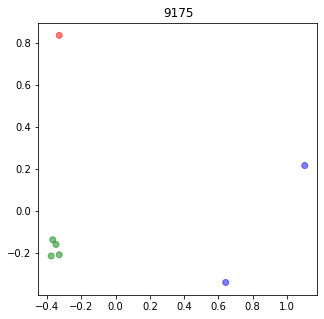

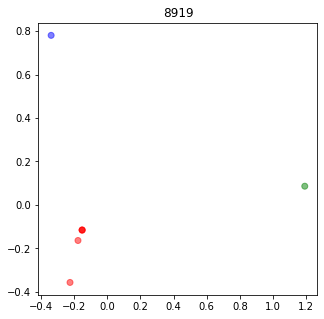

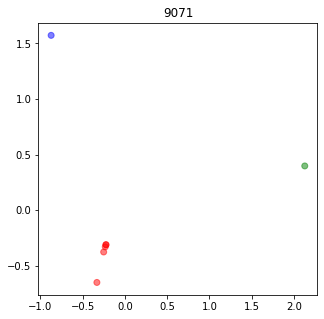

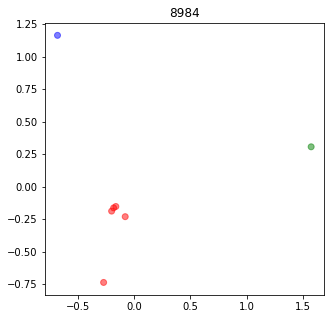

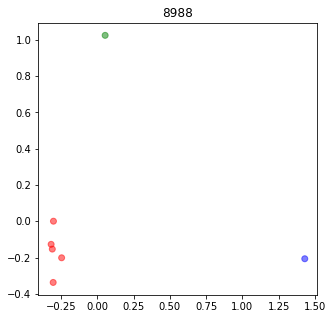

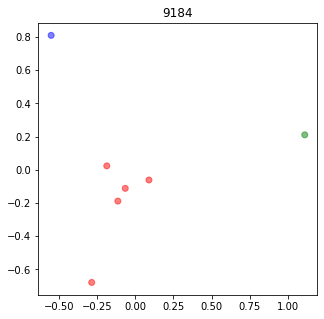

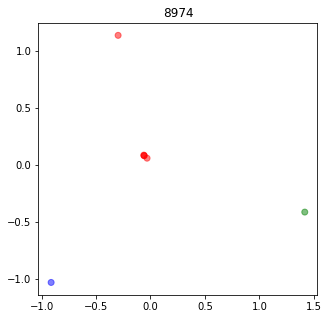

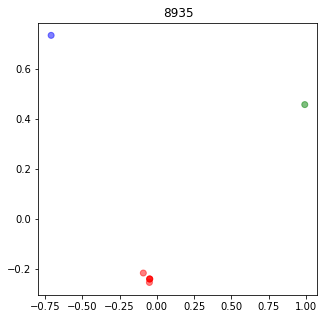

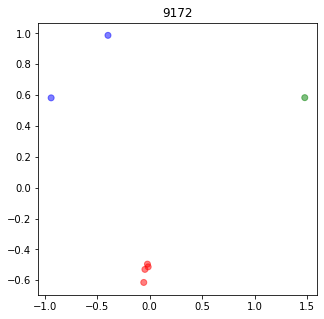

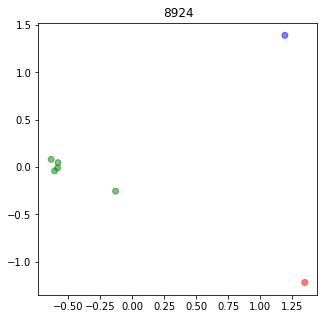

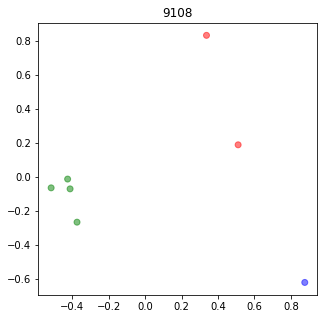

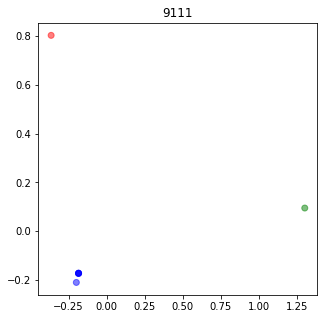

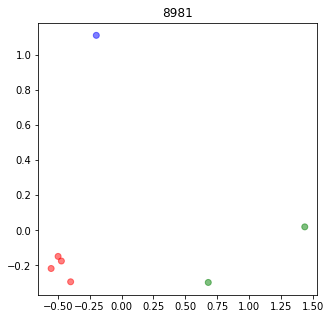

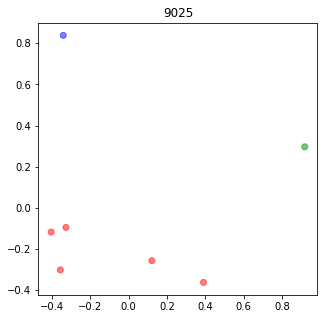

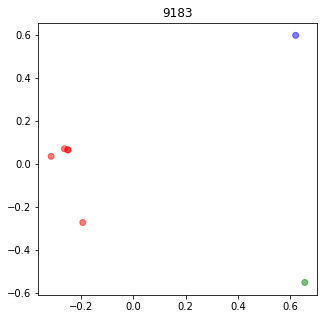

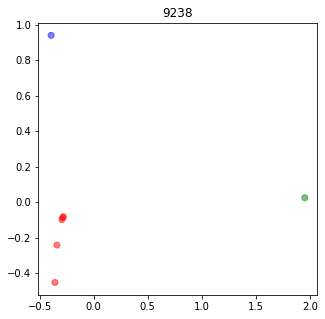

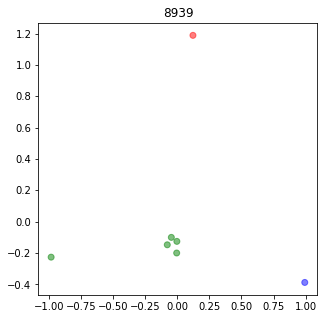

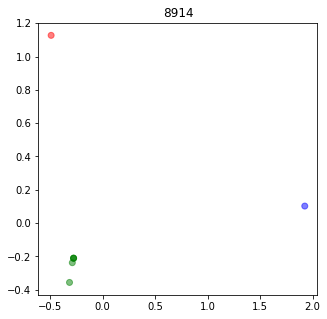

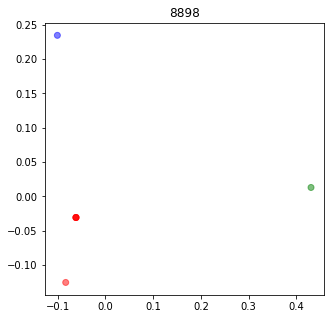

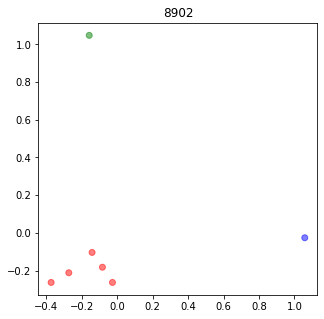

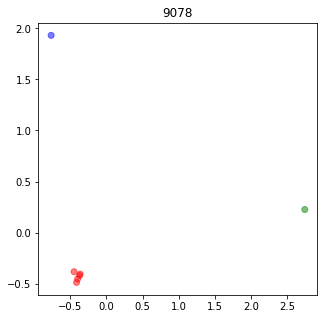

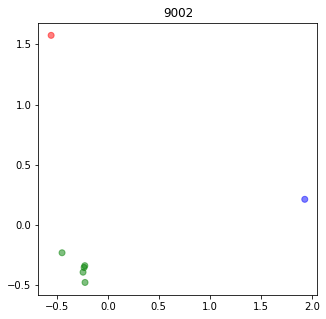

In [124]:
for i in pca_dict.keys():
    
    kmeans = KMeans(n_clusters=3, n_init=5)
    kmeans.fit(pca_dict[i])

    labels = kmeans.predict(pca_dict[i])
    centroids = kmeans.cluster_centers_

    fig = plt.figure(figsize=(5, 5))
#     colmap = {1: 'red', 2: 'green', 3: 'blue', 4: 'orange'}
    colmap = {1: 'red', 2: 'green', 3: 'blue'}

    colors = list(map(lambda x: colmap[x+1], labels))
    pca_dict[i]['labels'] = colors

    plt.scatter(pca_dict[i]['x1'], pca_dict[i]['x2'], color=colors, alpha=0.5, edgecolor=colors)
    plt.title(i)

In [125]:
for i in pca_dict.keys():
    print(i)
    display(pca_dict[i])

9175


,x1,x2,labels
0,1.103499,0.217254,blue
1,-0.366217,-0.136019,green
2,-0.347286,-0.158370,green
3,-0.328466,-0.207384,green
4,-0.328394,0.836951,red
5,0.642509,-0.339181,blue
6,-0.375645,-0.213250,green


8919


,x1,x2,labels
0,-0.176059,-0.163660,red
1,-0.151106,-0.115506,red
2,-0.151106,-0.115506,red
3,-0.151106,-0.115506,red
4,1.191505,0.086246,green
5,-0.224108,-0.356764,red
6,-0.338020,0.780696,blue


9071


,x1,x2,labels
0,-0.871766,1.572788,blue
1,-0.222969,-0.309639,red
2,-0.222969,-0.309639,red
3,-0.231250,-0.328561,red
4,2.129341,0.398714,green
5,-0.250060,-0.374970,red
6,-0.330327,-0.648692,red


8984


,x1,x2,labels
0,1.572094,0.306344,green
1,-0.199363,-0.187756,red
2,-0.078720,-0.230409,red
3,-0.161973,-0.152263,red
4,-0.679865,1.162670,blue
5,-0.181643,-0.162789,red
6,-0.270531,-0.735796,red


8988


,x1,x2,labels
0,1.430107,-0.206467,blue
1,-0.310776,-0.153257,red
2,-0.246538,-0.201120,red
3,-0.304738,-0.337061,red
4,0.053628,1.024575,green
5,-0.302828,0.000399,red
6,-0.318855,-0.127069,red


9184


,x1,x2,labels
0,1.108803,0.210035,green
1,0.089793,-0.061902,red
2,-0.113415,-0.189032,red
3,-0.065168,-0.112401,red
4,-0.284412,-0.679129,red
5,-0.185831,0.023077,red
6,-0.549770,0.809352,blue


8974


,x1,x2,labels
0,-0.296955,1.136090,red
1,-0.057924,0.081288,red
2,-0.060948,0.086222,red
3,-0.057924,0.081288,red
4,-0.911920,-1.030484,blue
5,-0.031174,0.059076,red
6,1.416844,-0.413480,green


8935


,x1,x2,labels
0,-0.708608,0.734382,blue
1,-0.047774,-0.240338,red
2,-0.047774,-0.240338,red
3,-0.047774,-0.240338,red
4,0.992074,0.457354,green
5,-0.049634,-0.254197,red
6,-0.090509,-0.216525,red


9172


,x1,x2,labels
0,-0.397748,0.986771,blue
1,-0.045913,-0.529436,red
2,-0.056971,-0.614032,red
3,-0.021935,-0.495329,red
4,1.476672,0.583202,green
5,-0.014886,-0.513048,red
6,-0.939219,0.581872,blue


8924


,x1,x2,labels
0,1.192771,1.392039,blue
1,-0.581312,0.046913,green
2,-0.584431,-0.007961,green
3,-0.608368,-0.039678,green
4,1.348373,-1.218829,red
5,-0.131442,-0.254085,green
6,-0.635592,0.081600,green


9108


,x1,x2,labels
0,0.337056,0.834044,red
1,-0.373002,-0.264235,green
2,-0.424557,-0.010857,green
3,-0.514992,-0.062450,green
4,0.876005,-0.618597,blue
5,-0.411065,-0.068474,green
6,0.510556,0.190569,red


9111


,x1,x2,labels
0,1.301854,0.095181,green
1,-0.184542,-0.172002,blue
2,-0.184542,-0.172002,blue
3,-0.184542,-0.172002,blue
4,-0.364663,0.802295,red
5,-0.199022,-0.209469,blue
6,-0.184542,-0.172002,blue


8981


,x1,x2,labels
0,0.680430,-0.297181,green
1,-0.497344,-0.148632,red
2,-0.398971,-0.293440,red
3,-0.471593,-0.174972,red
4,1.437157,0.019804,green
5,-0.551953,-0.217629,red
6,-0.197726,1.112049,blue


9025


,x1,x2,labels
0,0.919572,0.296567,green
1,-0.327740,-0.095266,red
2,-0.405115,-0.117814,red
3,-0.356706,-0.301996,red
4,-0.341688,0.838480,blue
5,0.121046,-0.257021,red
6,0.390631,-0.362950,red


9183


,x1,x2,labels
0,0.656405,-0.553038,green
1,-0.251626,0.063863,red
2,-0.315662,0.033820,red
3,-0.264575,0.069041,red
4,0.621399,0.596723,blue
5,-0.251626,0.063863,red
6,-0.194316,-0.274271,red


9238


,x1,x2,labels
0,-0.393102,0.939613,blue
1,-0.293729,-0.098690,red
2,-0.286039,-0.088312,red
3,-0.280621,-0.081956,red
4,1.951025,0.024493,green
5,-0.339804,-0.242312,red
6,-0.357730,-0.452835,red


8939


,x1,x2,labels
0,-0.982401,-0.226551,green
1,-0.046311,-0.100379,green
2,0.121980,1.188312,red
3,-0.003314,-0.125864,green
4,0.992719,-0.387858,blue
5,-0.004728,-0.200022,green
6,-0.077946,-0.147639,green


8914


,x1,x2,labels
0,-0.490522,1.127428,red
1,-0.276798,-0.211323,green
2,-0.276798,-0.211323,green
3,-0.276798,-0.211323,green
4,1.925165,0.101864,blue
5,-0.288816,-0.238353,green
6,-0.315434,-0.356970,green


8898


,x1,x2,labels
0,0.430763,0.013084,green
1,-0.061713,-0.030612,red
2,-0.061713,-0.030612,red
3,-0.061713,-0.030612,red
4,-0.083237,-0.125147,red
5,-0.100675,0.234511,blue
6,-0.061713,-0.030612,red


8902


,x1,x2,labels
0,1.058590,-0.025579,blue
1,-0.083777,-0.181963,red
2,-0.027163,-0.262627,red
3,-0.273647,-0.211267,red
4,-0.373431,-0.262644,red
5,-0.142198,-0.103517,red
6,-0.158374,1.047596,green


9078


,x1,x2,labels
0,2.738471,0.225279,green
1,-0.367540,-0.422033,red
2,-0.395555,-0.455046,red
3,-0.360550,-0.407006,red
4,-0.760694,1.932507,blue
5,-0.409426,-0.489425,red
6,-0.444706,-0.384274,red


9002


,x1,x2,labels
0,1.932006,0.213362,blue
1,-0.243373,-0.391332,green
2,-0.223870,-0.476350,green
3,-0.233016,-0.352160,green
4,-0.556451,1.573772,red
5,-0.225944,-0.337233,green
6,-0.449351,-0.230058,green


## Zeiss - No Bias Boxes

### Healthy

In [26]:
path13 = '../../Zeiss/Healthy/Healthy(3)/'
path5 = '../../Zeiss/Healthy/Healthy(5)/'
path6 = '../../Zeiss/Healthy/Healthy(6)/'
paths = [path13,path5, path6]

def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                yield pd.read_csv(new_path)


corpus_healthy = pd.concat(load_files(paths))

In [27]:
x = corpus_healthy.norm_pos_x
y = corpus_healthy.norm_pos_y
arr = equal_boxes(x,y)

corpus = corpus_healthy
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus(corpus_new)
        

In [28]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,"(40, 40)","(40, 41)","(40, 42)","(40, 43)","(40, 44)","(40, 45)","(40, 46)","(40, 47)","(40, 48)","(40, 49)",...,"(1651, 1642)","(1651, 1643)","(1651, 1644)","(1651, 1645)","(1651, 1646)","(1651, 1647)","(1651, 1648)","(1651, 1649)","(1651, 1650)","(1651, 1651)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [29]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])


/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


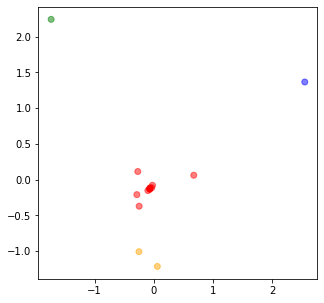

In [30]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [31]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.069503,-0.132272,r
1,-0.100115,-0.153945,r
2,-0.071077,-0.125342,r
3,-0.060739,-0.114259,r
4,-0.022772,-0.079392,r
5,-1.734839,2.242374,g
6,-0.270751,0.112940,r
7,-0.069352,-0.136716,r
8,2.549743,1.365643,b
9,-0.248193,-0.372145,r


### Glaucoma

In [32]:
path13 = '../../Zeiss/Glaucoma/Glaucoma(3)/'
path5 = '../../Zeiss/Glaucoma/Glaucoma(5)/'
path6 = '../../Zeiss/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]

def load_files(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                new_path = i + filename 
                yield pd.read_csv(new_path)

corpus_diseased = pd.concat(load_files(paths))

In [33]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = equal_boxes(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus(corpus_new)
        

In [34]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,"(17, 17)","(17, 18)","(17, 25)","(17, 51)","(17, 58)","(17, 59)","(17, 60)","(17, 61)","(17, 62)","(17, 63)",...,"(1487, 1478)","(1487, 1479)","(1487, 1480)","(1487, 1481)","(1487, 1482)","(1487, 1483)","(1487, 1484)","(1487, 1485)","(1487, 1486)","(1487, 1487)"
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


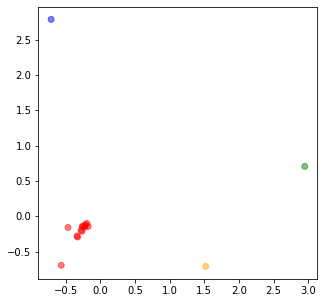

In [36]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [37]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.256293,-0.151591,r
1,-0.255003,-0.140549,r
2,-0.210825,-0.118589,r
3,-0.192773,-0.101657,r
4,-0.464997,-0.159017,r
5,-0.708389,2.786660,b
6,-0.263101,-0.212532,r
7,-0.222054,-0.151226,r
8,-0.562385,-0.693177,r
9,-0.276706,-0.198796,r


## Zeiss - Bias Boxes

### Right Side - Healthy

In [38]:
path13 = '../../Zeiss/Healthy/Healthy(3)/'
path5 = '../../Zeiss/Healthy/Healthy(5)/'
path6 = '../../Zeiss/Healthy/Healthy(6)/'
paths = [path13,path5, path6]

left = ['8919', '9059', '8960', '9187', '9238', '8914', '8974', '8981', '9025', '9071', '9172', '8904', '8955']
right = ['9189', '8994', '8924', '9175', '8909', '9061', '9084', '9189', 'RNFL']

def load_files_left(path):
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                if filename[-8:-4]  in left: 
                    new_path = i + filename 
                    yield pd.read_csv(new_path)
                    
def load_files_right(path): 
    for i in path:
        path_i = os.listdir(i)
        for filename in path_i:
            if filename!='.ipynb_checkpoints': 
                if filename[-8:-4]  in right: 
                    new_path = i + filename 
                    yield pd.read_csv(new_path)

corpus_healthy = pd.concat(load_files_right(paths))


In [39]:
def bias_boxes_zeiss_right(x,y):
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.61 > i and 0<j and .275 > j: 
            arr.append('A')
        elif 0.61<i and 1 > i and 0<j and .25 > j: 
            arr.append('B')
        elif 0.61<i and 1 > i and .25<j and .5 > j: 
            arr.append('C')
        elif 0.61<i and 1 > i and 0.5<j and 1 > j: 
            arr.append('D')
        elif 0.23<i and 0.61 > i and 0.7<j and 1 > j: 
            arr.append('E')
        elif 0<i and 0.61 > i and 0.5<j and 0.7 > j: 
            arr.append('F')
        else: 
            arr.append('error')
    return arr

def bias_boxes_zeiss_left(x,y): 
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.4 > i and 0<j and .2 > j: 
            arr.append('A')
        elif 0<i and 0.4 > i and 0.2<j and .5 > j: 
            arr.append('B')
        elif 0.0<i and 0.4 > i and 0.5<j and 1 > j: 
            arr.append('C')
        elif 0.4<i and 0.8 > i and 0<j and 0.25 > j: 
            arr.append('D')
        elif 0.4<i and 1 > i and 0.5<j and 0.71 > j: 
            arr.append('E')
        elif 0.4<i and 0.8 > i and 0.71<j and 1 > j: 
            arr.append('F')
        else: 
            arr.append('error')
    return arr

def make_corpus_3(corpus_new):
    A = np.array(corpus_new.fixation_id[corpus_new.letters=='A'])
    B = np.array(corpus_new.fixation_id[corpus_new.letters=='B'])
    C = np.array(corpus_new.fixation_id[corpus_new.letters=='C'])
    D = np.array(corpus_new.fixation_id[corpus_new.letters=='D'])
    E = np.array(corpus_new.fixation_id[corpus_new.letters=='E'])
    F = np.array(corpus_new.fixation_id[corpus_new.letters=='F'])
    corpus = pd.DataFrame([[1, A], 
                           [2, B],
                           [3, C], 
                           [4, D], 
                           [5, E], 
                           [6, F]], columns=['id', 'sequence'])
    return corpus

x = corpus_healthy.norm_pos_x
y = corpus_healthy.norm_pos_y
arr = bias_boxes_zeiss_right(x,y)

corpus = corpus_healthy
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_3(corpus_new)

In [40]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [41]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


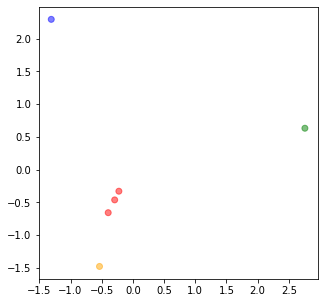

In [42]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [43]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.395911,-0.657733,r
1,-0.224765,-0.329595,r
2,-0.292103,-0.462266,r
3,-0.535247,-1.479135,orange
4,2.756618,0.632512,g
5,-1.308591,2.296217,b


### Right Side - Glaucoma

In [44]:
path13 = '../../Zeiss/Glaucoma/Glaucoma(3)/'
path5 = '../../Zeiss/Glaucoma/Glaucoma(5)/'
path6 = '../../Zeiss/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]

left = ['8919', '9059', '8960', '9187', '9238', '8914', '8974', '8981', '9025', '9071', '9172', '8904', '8955']
right = ['9189', '8994', '8924', '9175', '8909', '9061', '9084', '9189', 'RNFL']

corpus_diseased = pd.concat(load_files_right(paths))

In [45]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = bias_boxes_zeiss_right(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_3(corpus_new)

In [46]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [47]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


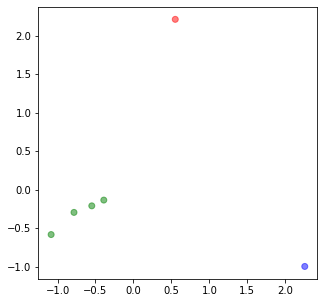

In [48]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [49]:
df['labels'] = colors
df

,x1,x2,labels
0,-1.084413,-0.581284,g
1,-0.390664,-0.133822,g
2,-0.548953,-0.208441,g
3,2.256560,-0.995286,b
4,0.550845,2.212555,r
5,-0.783374,-0.293722,g


### Left Side - Healthy

In [50]:
path13 = '../../Zeiss/Healthy/Healthy(3)/'
path5 = '../../Zeiss/Healthy/Healthy(5)/'
path5 = '../../Zeiss/Healthy/Healthy(6)/'
paths = [path13,path5, path6]
corpus_healthy = pd.concat(load_files_left(paths))


In [51]:
x = corpus_healthy.norm_pos_x
y = corpus_healthy.norm_pos_y
arr = bias_boxes_zeiss_left(x,y)

corpus = corpus_healthy
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_3(corpus_new)

In [52]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [53]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


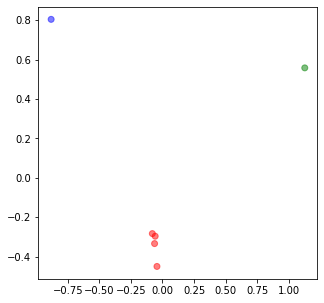

In [54]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [55]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.057929,-0.295887,r
1,-0.882211,0.803689,b
2,1.127137,0.557637,g
3,-0.080461,-0.282716,r
4,-0.062695,-0.333401,r
5,-0.043841,-0.449322,r


### Left Side - Glaucoma

In [56]:
path13 = '../../Zeiss/Glaucoma/Glaucoma(3)/'
path5 = '../../Zeiss/Glaucoma/Glaucoma(5)/'
path6 = '../../Zeiss/Glaucoma/Glaucoma(6)/'
paths = [path13,path5, path6]
corpus_diseased = pd.concat(load_files_left(paths))

In [57]:
x = corpus_diseased.norm_pos_x
y = corpus_diseased.norm_pos_y
arr = bias_boxes_zeiss_left(x,y)

corpus = corpus_diseased
corpus['letters'] = arr
corpus_new = corpus[['letters', 'fixation_id']]
corpus= make_corpus_3(corpus_new)

In [58]:
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)
sgtembedding_df = sgtembedding_df.set_index('id')


INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [59]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)
X=pca.transform(sgtembedding_df)

df = pd.DataFrame(data=X, columns=['x1', 'x2'])

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


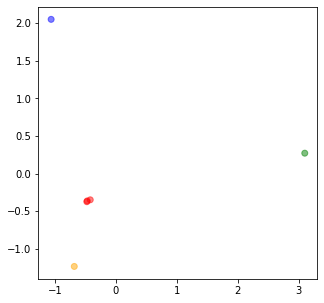

In [60]:
kmeans = KMeans(n_clusters=4, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'orange'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [61]:
df['labels'] = colors
df

,x1,x2,labels
0,-0.474633,-0.374271,r
1,-0.680500,-1.235309,orange
2,3.102227,0.271004,g
3,-0.418500,-0.349037,r
4,-0.468053,-0.363337,r
5,-1.060542,2.050950,b
